In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ee08e10-94b3-4558-a898-1bf9ba42e58e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-12-21T11:34:31.516Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10424}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11849, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [12]:
type(data)

dict

In [13]:
import pandas as pd


#This allows you to see all the columns, not just like 15
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [14]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979912e+07,1.979912e+07,...,57.0816,2.058775e+12,None,2024-12-21T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
1,1027,Ethereum,ETH,ethereum,9710,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204536e+08,1.204536e+08,...,12.2012,4.144299e+11,None,2024-12-21T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
2,825,Tether USDt,USDT,tether,109566,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.398728e+11,1.434401e+11,...,4.1172,1.434122e+11,None,2024-12-21T11:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-21 14:35:45.517533
3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.725238e+10,9.998681e+10,...,3.8736,2.298120e+11,None,2024-12-21T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
4,1839,BNB,BNB,bnb,2314,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440078e+08,1.440078e+08,...,2.8670,9.738086e+10,None,2024-12-21T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.792468e+08,5.905031e+08,...,2.7234,1.139782e+11,None,2024-12-21T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.472914e+11,1.472914e+11,...,1.4525,4.933591e+10,None,2024-12-21T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
7,3408,USDC,USDC,usd-coin,24055,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.285406e+10,4.285406e+10,...,1.2618,4.285869e+10,None,2024-12-21T11:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-21 14:35:45.517533
8,2010,Cardano,ADA,cardano,1418,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.512617e+10,4.499511e+10,...,0.9930,4.320844e+10,None,2024-12-21T11:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533
9,1958,TRON,TRX,tron,1086,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.621899e+10,8.621901e+10,...,0.6364,2.164035e+10,None,2024-12-21T11:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:35:45.517533


In [15]:
def api_runner():
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
        }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ee08e10-94b3-4558-a898-1bf9ba42e58e',
        }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\seda\OneDrive\Masaüstü\Crypto_API_pull\API.csv'):
        df.to_csv(r'C:\Users\seda\OneDrive\Masaüstü\Crypto_API_pull\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\seda\OneDrive\Masaüstü\Crypto_API_pull\API.csv', mode='a', header=False)

In [16]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60) #sleep for 1 minute
exit()

API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [17]:
df3 = pd.read_csv(r'C:\Users\seda\OneDrive\Masaüstü\Crypto_API_pull\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.979912e+07,...,57.2427,2.061825e+12,NaN,2024-12-21T11:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:40:22.472546
1,1,1027,Ethereum,ETH,ethereum,9710,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204536e+08,...,12.2081,4.153664e+11,NaN,2024-12-21T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:40:22.472546
2,2,825,Tether USDt,USDT,tether,109566,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.398728e+11,...,4.1102,1.434108e+11,NaN,2024-12-21T11:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-21 14:40:22.472546
3,3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.725238e+10,...,3.8662,2.297566e+11,NaN,2024-12-21T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:40:22.472546
4,4,1839,BNB,BNB,bnb,2314,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440078e+08,...,2.8645,9.747472e+10,NaN,2024-12-21T11:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:40:22.472546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,5805,Avalanche,AVAX,avalanche,828,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.098028e+08,...,0.4889,2.905183e+10,NaN,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
71,11,1975,Chainlink,LINK,chainlink,1902,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.381000e+08,...,0.4469,2.386764e+10,NaN,2024-12-21T11:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-12-21 14:44:24.302865
72,12,11419,Toncoin,TON,toncoin,641,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.551722e+09,...,0.4128,2.817268e+10,NaN,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
73,13,20947,Sui,SUI,sui,491,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,2.927660e+09,...,0.4089,4.752471e+10,NaN,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865


In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19799115.00000,19799115.00000,...,57.16390,2062896287478.80005,None,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
1,1027,Ethereum,ETH,ethereum,9710,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120453570.82352,120453570.82352,...,12.19880,415048955302.91998,None,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
2,825,Tether USDt,USDT,tether,109566,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139872815646.93893,143440125287.04865,...,4.10980,143396143479.75000,None,2024-12-21T11:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-21 14:44:24.302865
3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57252380420.00000,99986807248.00000,...,3.87360,230198675439.37000,None,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
4,1839,BNB,BNB,bnb,2314,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007751.27000,144007751.27000,...,2.86600,97526898024.16000,None,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479246666.98868,590502952.17321,...,2.72130,114084486712.39000,None,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147291716383.70523,147291716383.70523,...,1.45350,49455005119.03000,None,2024-12-21T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
7,3408,USDC,USDC,usd-coin,24055,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42852589712.97511,42852589712.97511,...,1.25950,42853233865.80000,None,2024-12-21T11:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-21 14:44:24.302865
8,2010,Cardano,ADA,cardano,1418,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35126169612.19378,44995107818.69111,...,0.98980,43216146539.00000,None,2024-12-21T11:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865
9,1958,TRON,TRX,tron,1086,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,86218913728.28734,86218917743.76659,...,0.63640,21660888988.98000,None,2024-12-21T11:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-21 14:44:24.302865


In [20]:
df4 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02576,5.59381,-3.32308,0.46532,45.92494,56.28798
Ethereum,-0.45323,10.45772,-11.69039,9.71327,30.77062,33.28483
Tether USDt,-0.00567,0.12601,-0.02772,-0.04389,0.05235,-0.07813
XRP,-0.66725,15.95354,-5.35590,106.95506,330.74850,287.90601
BNB,-0.49040,8.92841,-6.05215,11.19275,13.78352,16.18960
Solana,-0.76025,8.72054,-14.11384,-20.05272,14.69368,33.29301
Dogecoin,-0.80843,25.97750,-17.49980,-11.88689,134.55866,213.83831
USDC,-0.00541,0.01448,0.01252,0.00609,0.01714,-0.03124
Cardano,-1.02706,23.02918,-12.74889,21.99865,165.17528,172.35026


In [21]:
df5 = df4.stack()
df5

name                                   
Bitcoin    quote.USD.percent_change_1h      0.02576
           quote.USD.percent_change_24h     5.59381
           quote.USD.percent_change_7d     -3.32308
           quote.USD.percent_change_30d     0.46532
           quote.USD.percent_change_60d    45.92494
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    22.11756
           quote.USD.percent_change_7d    -18.18875
           quote.USD.percent_change_30d    -3.79485
           quote.USD.percent_change_60d    26.07696
           quote.USD.percent_change_90d    58.30243
Length: 90, dtype: float64

In [22]:
df6 = df5.to_frame(name='values')
df6

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.02576
          quote.USD.percent_change_24h   5.59381
          quote.USD.percent_change_7d   -3.32308
          quote.USD.percent_change_30d   0.46532
          quote.USD.percent_change_60d  45.92494
...                                          ...
Shiba Inu quote.USD.percent_change_24h  22.11756
          quote.USD.percent_change_7d  -18.18875
          quote.USD.percent_change_30d  -3.79485
          quote.USD.percent_change_60d  26.07696
          quote.USD.percent_change_90d  58.30243

[90 rows x 1 columns]

In [23]:
df6.count()

values    90
dtype: int64

In [24]:
index_ = pd.Index(range(90))

df7= df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02576
1,Bitcoin,quote.USD.percent_change_24h,5.59381
2,Bitcoin,quote.USD.percent_change_7d,-3.32308
3,Bitcoin,quote.USD.percent_change_30d,0.46532
4,Bitcoin,quote.USD.percent_change_60d,45.92494
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,22.11756
86,Shiba Inu,quote.USD.percent_change_7d,-18.18875
87,Shiba Inu,quote.USD.percent_change_30d,-3.79485
88,Shiba Inu,quote.USD.percent_change_60d,26.07696


In [25]:
df8 = df7.rename(columns = {'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02576
1,Bitcoin,quote.USD.percent_change_24h,5.59381
2,Bitcoin,quote.USD.percent_change_7d,-3.32308
3,Bitcoin,quote.USD.percent_change_30d,0.46532
4,Bitcoin,quote.USD.percent_change_60d,45.92494
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,22.11756
86,Shiba Inu,quote.USD.percent_change_7d,-18.18875
87,Shiba Inu,quote.USD.percent_change_30d,-3.79485
88,Shiba Inu,quote.USD.percent_change_60d,26.07696


In [26]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.02576
1,Bitcoin,24h,5.59381
2,Bitcoin,7d,-3.32308
3,Bitcoin,30d,0.46532
4,Bitcoin,60d,45.92494
...,...,...,...
85,Shiba Inu,24h,22.11756
86,Shiba Inu,7d,-18.18875
87,Shiba Inu,30d,-3.79485
88,Shiba Inu,60d,26.07696


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

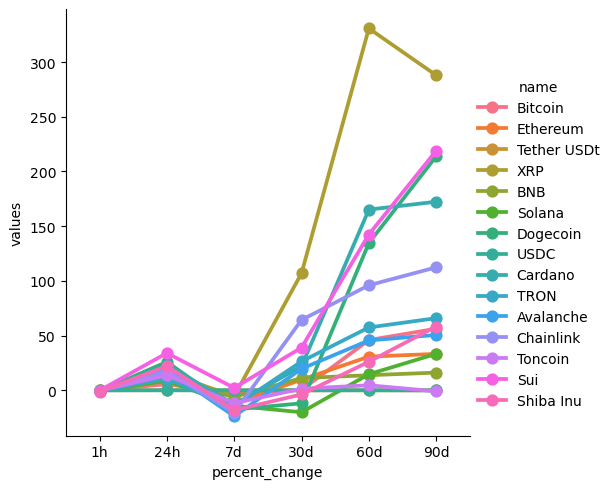

In [28]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [29]:
df9 = df3[['name', 'quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,98182.14154,2024-12-21 14:40:22.472546
15,Bitcoin,98252.89288,2024-12-21 14:41:22.753072
30,Bitcoin,98224.96907,2024-12-21 14:42:23.071255
45,Bitcoin,98233.15655,2024-12-21 14:43:23.626591
60,Bitcoin,98233.15655,2024-12-21 14:44:24.302865


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

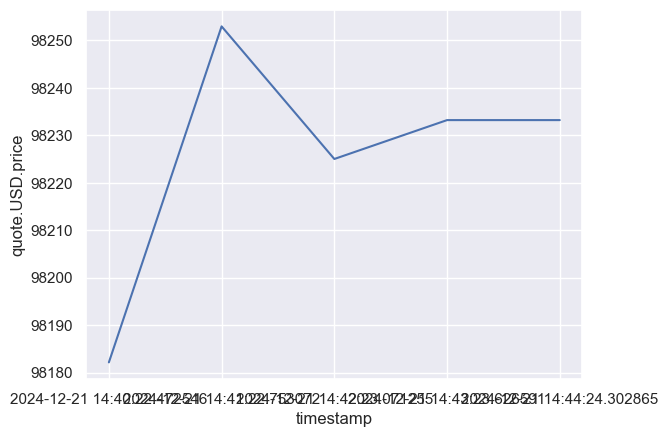

In [30]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data=df9)